## Бизнес-цель
Анализ ключевых факторов, влияющих на диабет. Предсказание вероятности развития диабета на основе медданных. Актуальность для планирвоания лечения.
1. Уровень давления(BloodPressure) и возраст(Age) - с возрастом артериальное давление может увеличиться, что является фактором риска для диабета.
2. Уровень инсулина(Insulin) и уровень глюкозы(Glucose) - уровень инсулина напрямую влияет на уровень сахара в крови.
3. Индекс массы тела(BMI) и возраст(Age) - с повышением возраста зачастую увеличивается индекс массы тела.
4. Уровень глюкозы(Glucose) и индекс массы тела(BMI) - как индекс массы тела влияет на уровень глюкозы.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("data/diabetes.csv")
df = df.head(1500)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Очистка данных

In [13]:
df_cleaned = df.drop(columns=['Pregnancies', 'DiabetesPedigreeFunction'], errors='ignore').dropna()
print(df_cleaned.head())

   Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  Outcome
0      148             72             35        0  33.6   50        1
1       85             66             29        0  26.6   31        0
2      183             64              0        0  23.3   32        1
3       89             66             23       94  28.1   21        0
4      137             40             35      168  43.1   33        1


## Визуализация парных взаимодействий

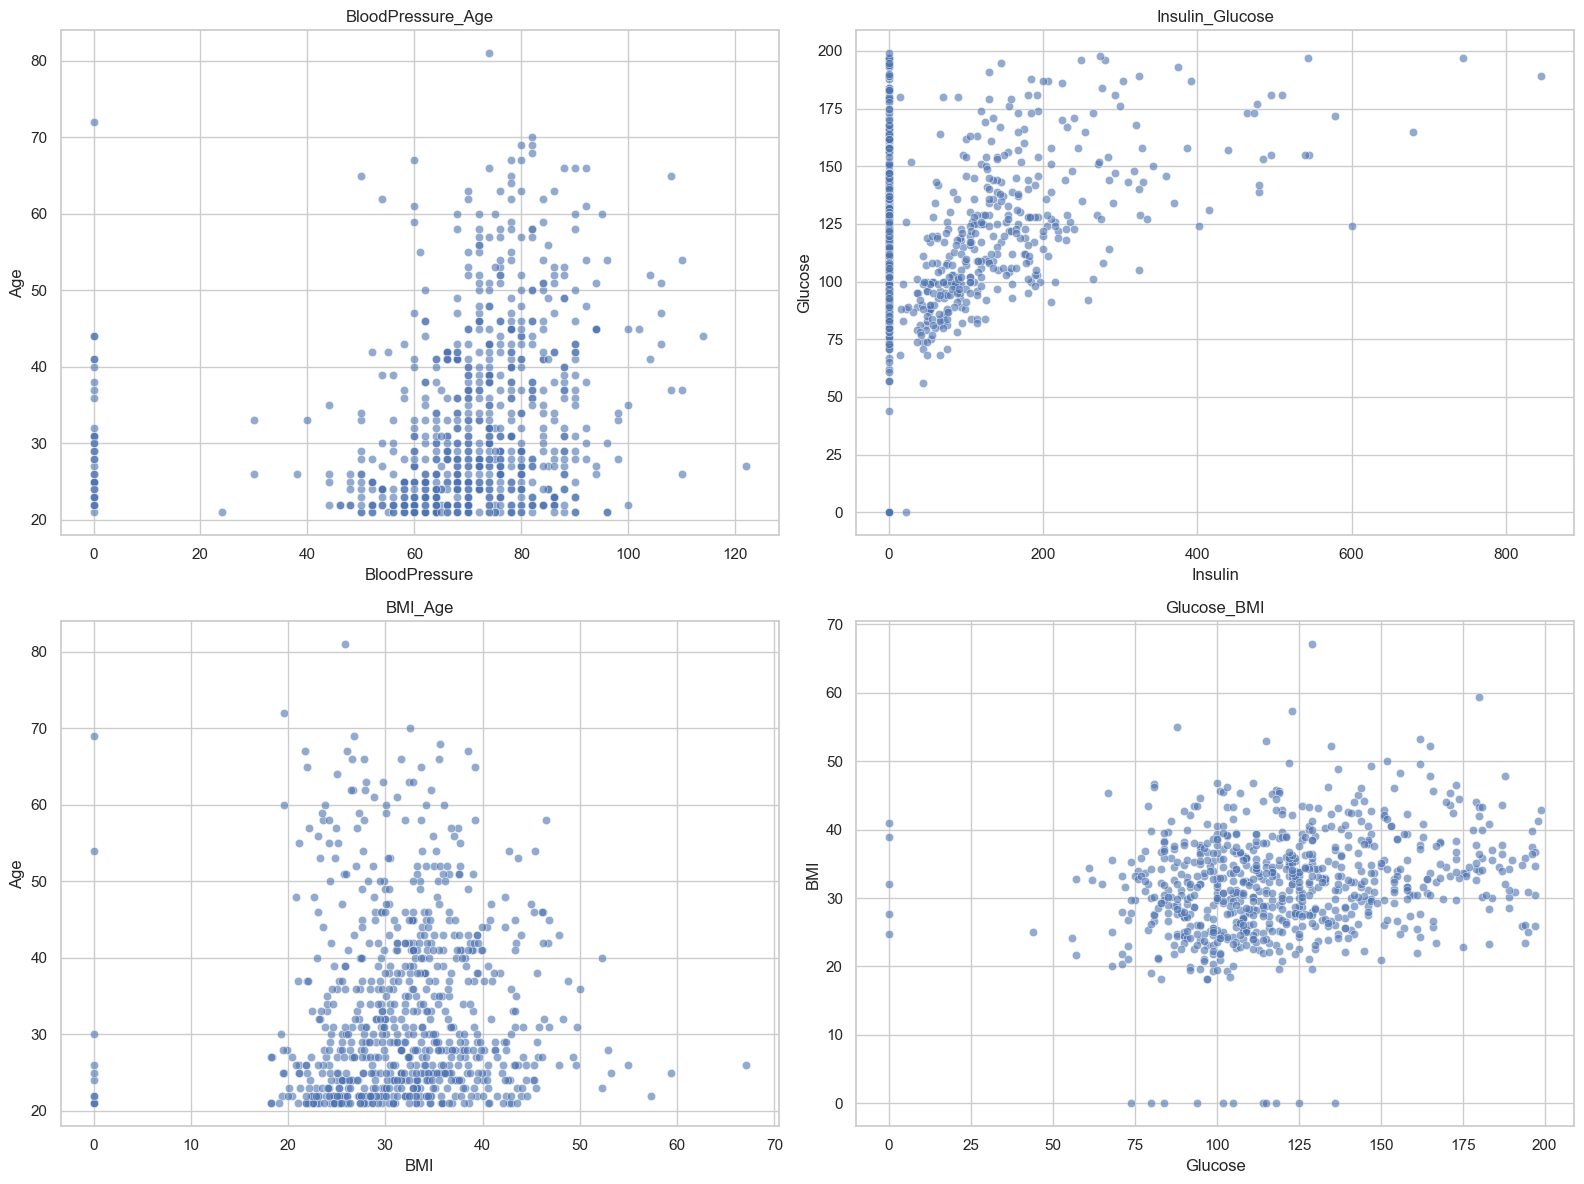

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))

# Визуализация взаимосвязи уровня давления и возраста
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['BloodPressure'], y=df_cleaned['Age'], alpha=0.6)
plt.title('BloodPressure_Age')

# Визуализация взаимосвязи уровня инсулина и уровня глюкозы
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Insulin'], y=df_cleaned['Glucose'], alpha=0.6)
plt.title('Insulin_Glucose')

# Визуализация взаимосвязи индекса массы тела и возраста
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['BMI'], y=df_cleaned['Age'], alpha=0.6)
plt.title('BMI_Age')

# Визуализация взаимосвязи уровня глюкозы и индекса массы тела
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Glucose'], y=df_cleaned['BMI'], alpha=0.6)
plt.title('Glucose_BMI')

plt.tight_layout()
plt.show()

## Стандартизация данных для кластеризации

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

## Агломеративная (иерархическая) кластеризация

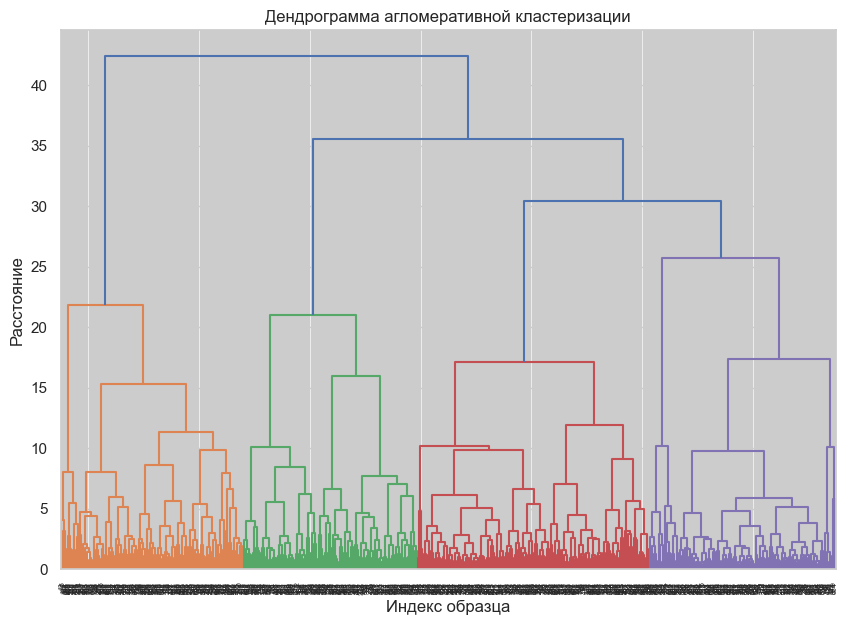

[ 4 15  6 15  2 15  2 14  1 17  8  6  7  1  3 13  4  6 10  2 12  8  6  2
  3  2  6 15  7  8  7  3 15 15 10 10  8  2  2  4 12  8  7  3  8  4 15 15
  2 16 15 15 15  3 12 15  3 10  8 10 16  6 15 11  6 10  2  8 15 11  2 11
  6 12 10  9  8 10 13 15 15 16 10 15  6 10 10 10  4 15 15 11 10  5 11 12
 10 15 15  4  6 15  8 15  8 11  8 12 10  2  3  1 10  8  3  5  6  8 15 15
  4 10 10  7  6  2 10 10  2  5  3  6  3 10 15 11 10 15  8 12  7 10 15  6
 12 17 10 10  7 15 12  8  3  1  6  4 15 15 15  4 12 10 12 15  6  2 11 15
 15 15  6  2 14 10 15  3  8  4  8  6 15 11  9 15  8  4  1  4  4  3 15 10
  6 13 15  4 15  2  2  3 15  8 15 15 12 15  3  6 10  4 15 10 12  4  2  4
  2 10  2  6  1  5 14  7 15 10  8  4  1 10  6  4 15  8 15  6  3  4  4 15
 15 10  6  2 12  5  8  1 12 15  8  8 15 10  2  2 10 15 11  3 12 13 10  7
  6 10 13 10 15 13  2 15  8 10  8 10  2 15  7 11  6 12 11  5  5  7  1  4
 15 10 10  2  4  2  7 12  3 11  2  7 13  2 10  6  8 10  3 11  2  2 15 10
  3 15  2 11 15  6 10  5 11  2  2  3 10 11  2  8  4

In [17]:
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

# Получение результатов кластеризации с заданным порогом
result = fcluster(linkage_matrix, t=10, criterion='distance')
print(result)

## Визуализация распределения кластеров

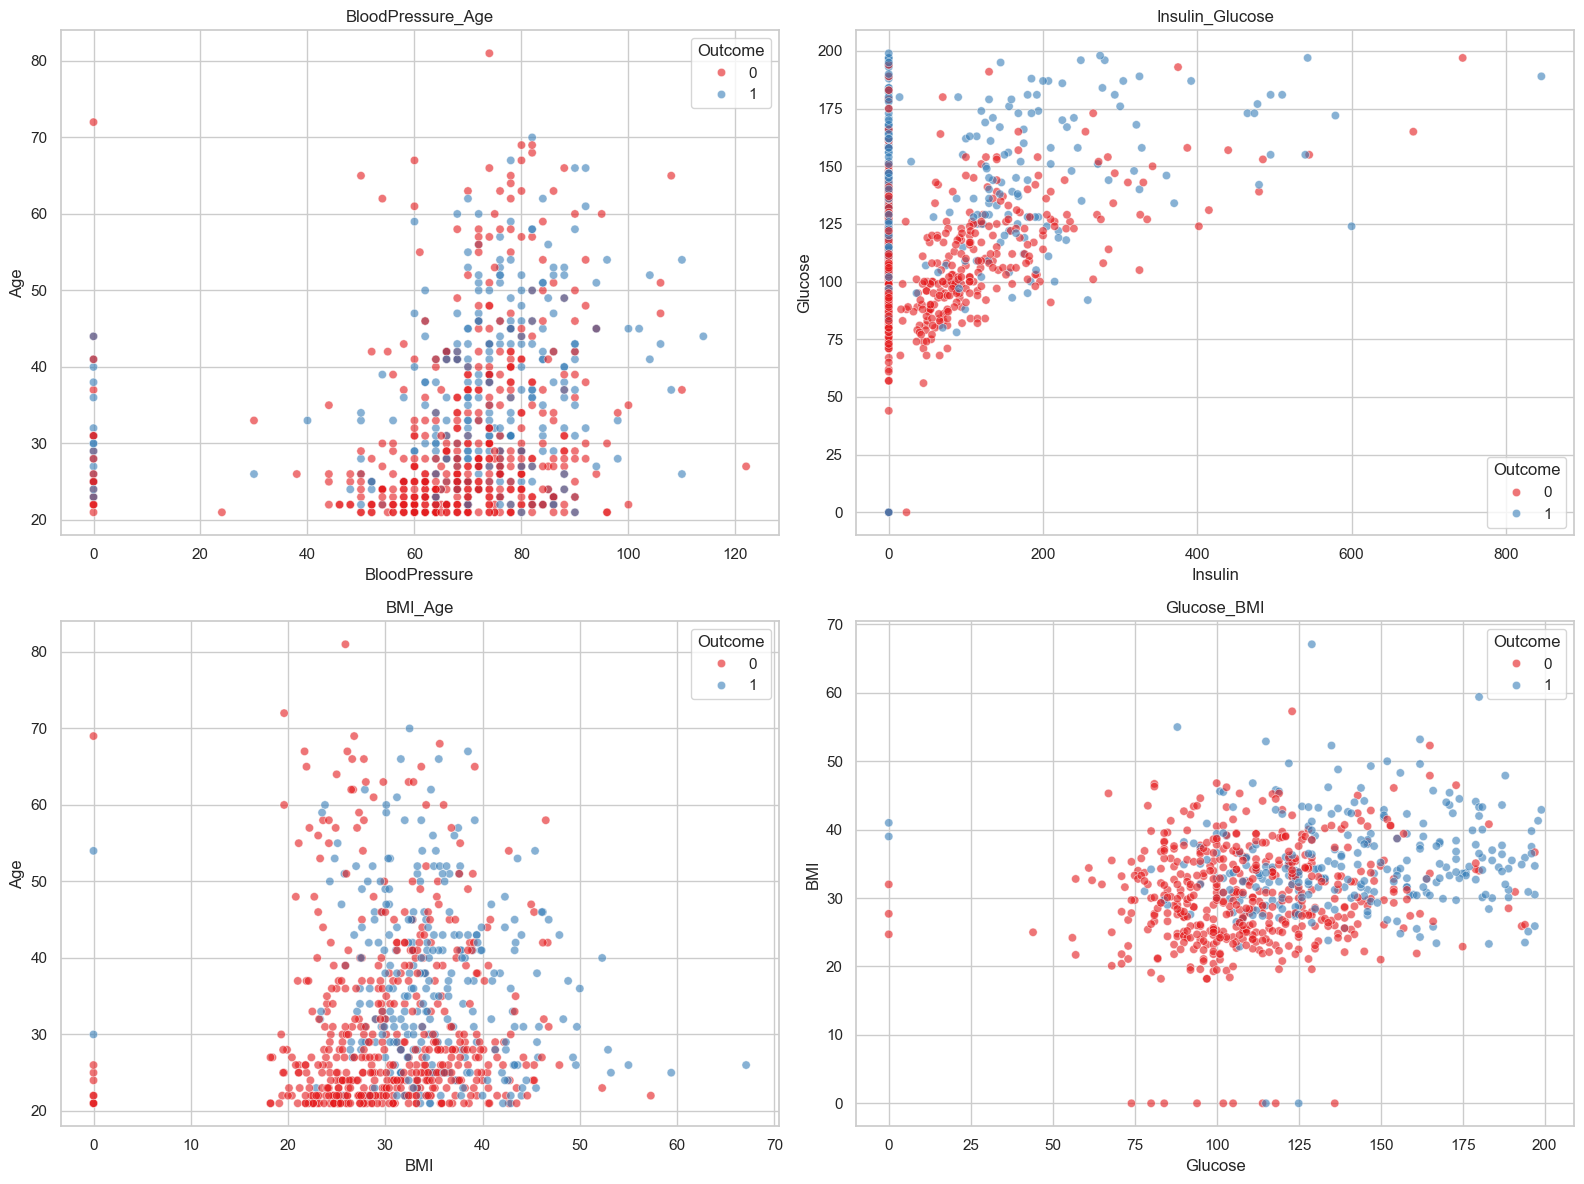

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))

# Визуализация взаимосвязи уровня давления и возраста
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['BloodPressure'], y=df_cleaned['Age'], hue=df_cleaned['Outcome'], palette='Set1', alpha=0.6)
plt.title('BloodPressure_Age')

# Визуализация взаимосвязи уровня инсулина и уровня глюкозы
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Insulin'], y=df_cleaned['Glucose'], hue=df_cleaned['Outcome'], palette='Set1', alpha=0.6)
plt.title('Insulin_Glucose')

# Визуализация взаимосвязи индекса массы тела и возраста
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['BMI'], y=df_cleaned['Age'], hue=df_cleaned['Outcome'], palette='Set1', alpha=0.6)
plt.title('BMI_Age')

# Визуализация взаимосвязи уровня глюкозы и индекса массы тела
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Glucose'], y=df_cleaned['BMI'], hue=df_cleaned['Outcome'], palette='Set1', alpha=0.6)
plt.title('Glucose_BMI')

plt.tight_layout()
plt.show()

## KMeans (неиерархическая кластеризация) для сравнения

Центры кластеров:
 [[103.03726708  33.13167702  72.86335404  29.18322981]
 [105.31168831  25.04350649  45.6038961   25.57792208]
 [136.91472868  29.89457364  78.20155039  53.64341085]
 [158.21472393  37.96809816  76.68711656  32.34969325]]


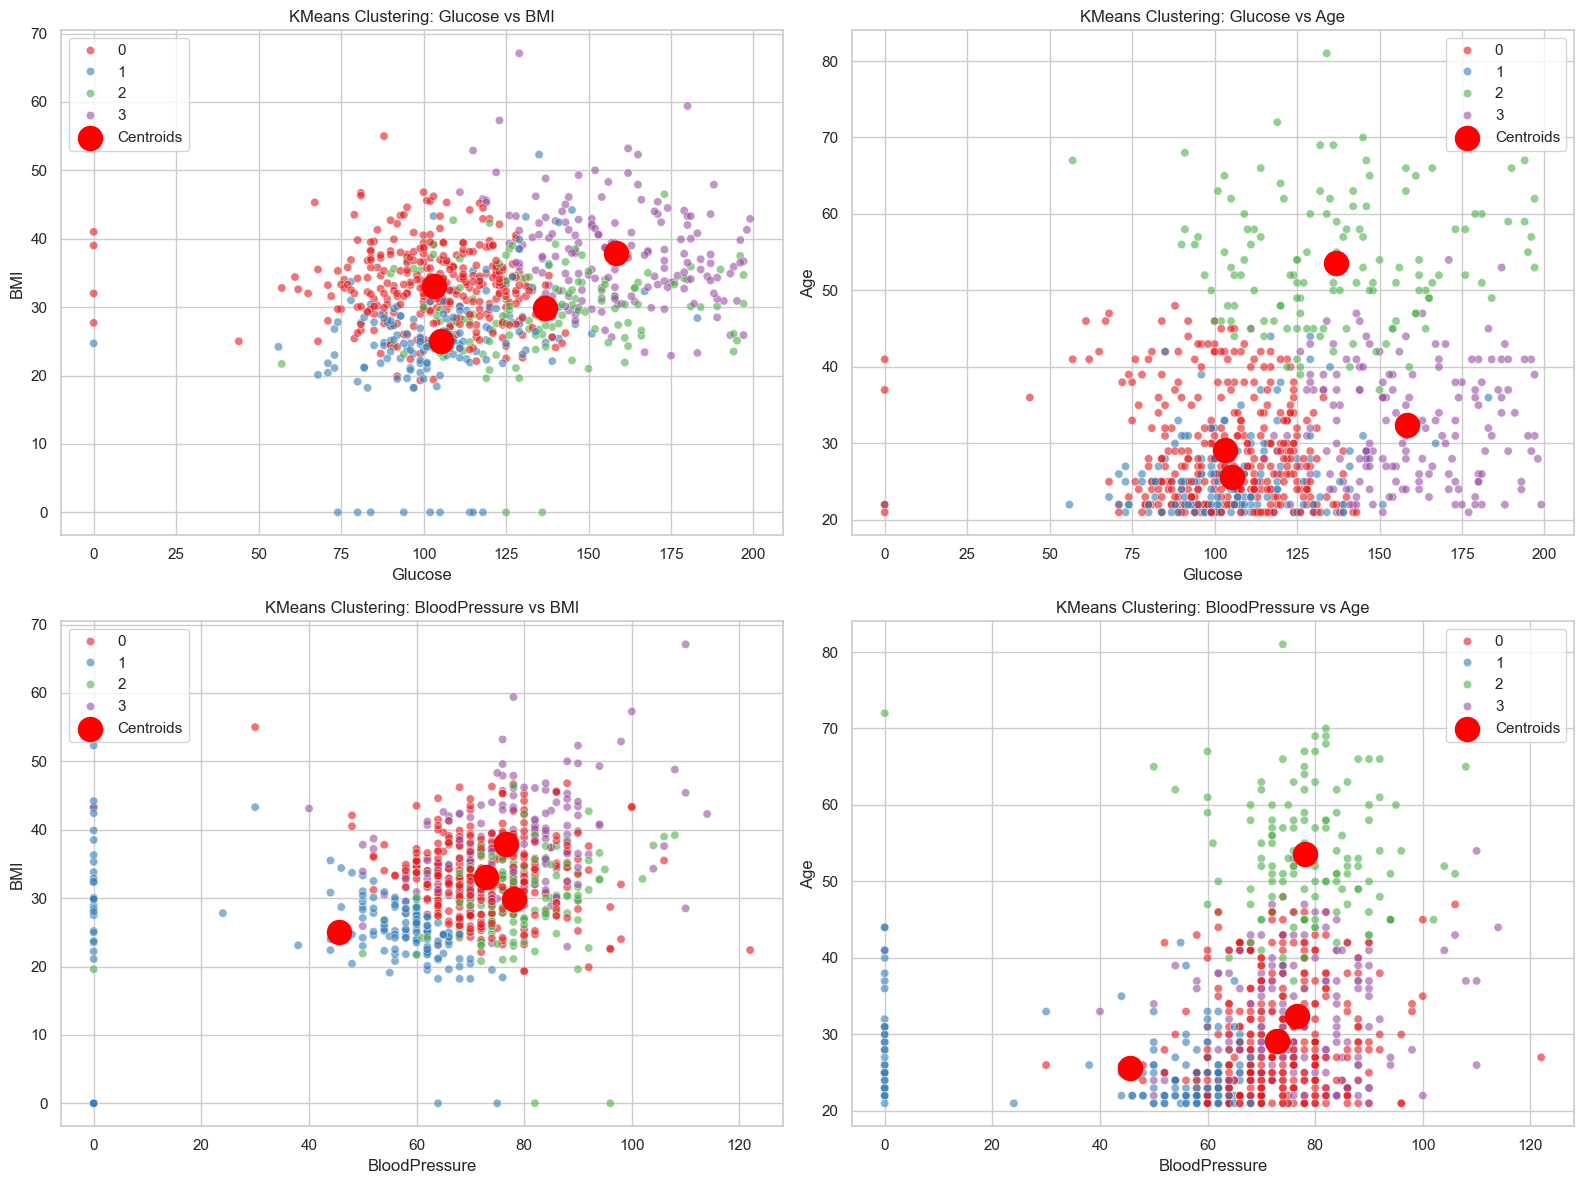

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned[['Glucose', 'BMI', 'BloodPressure', 'Age']])

# Обучение K-Means
random_state = 17
kmeans = KMeans(n_clusters=4, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Обратная стандартизация центров кластеров
centers = scaler.inverse_transform(centers)
print("Центры кластеров:\n", centers)

# Визуализация кластеризации
plt.figure(figsize=(16, 12))

# Взаимосвязь Glucose и BMI
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Glucose'], y=df_cleaned['BMI'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Glucose vs BMI')
plt.legend()

# Взаимосвязь Glucose и Age
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Glucose'], y=df_cleaned['Age'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Glucose vs Age')
plt.legend()

# Взаимосвязь BloodPressure и BMI
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['BloodPressure'], y=df_cleaned['BMI'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: BloodPressure vs BMI')
plt.legend()

# Взаимосвязь BloodPressure и Age
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['BloodPressure'], y=df_cleaned['Age'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: BloodPressure vs Age')
plt.legend()

plt.tight_layout()
plt.show()

## PCA для визуализации сокращенной размерности

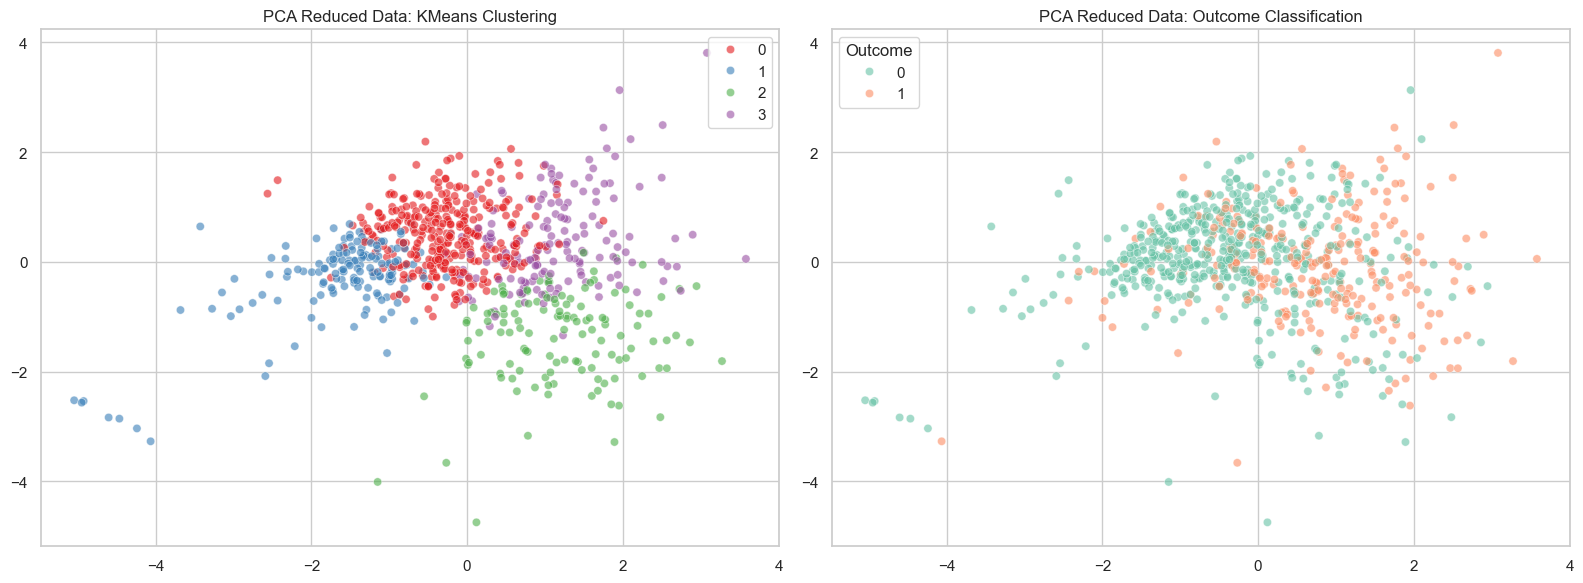

In [25]:
from sklearn.decomposition import PCA

# Снижение размерности с использованием PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))

# Визуализация для KMeans кластеризации
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA Reduced Data: KMeans Clustering')

# Визуализация для исходных данных с категорией Outcome
plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_cleaned['Outcome'], palette='Set2', alpha=0.6)
plt.title('PCA Reduced Data: Outcome Classification')

plt.tight_layout()
plt.show()

## Выбор количества кластеров на основе инерции
Инерция -- сумма квадратов расстояний выборок до ближайшего центра кластера, взвешенная по весам выборок, если таковые имеются.

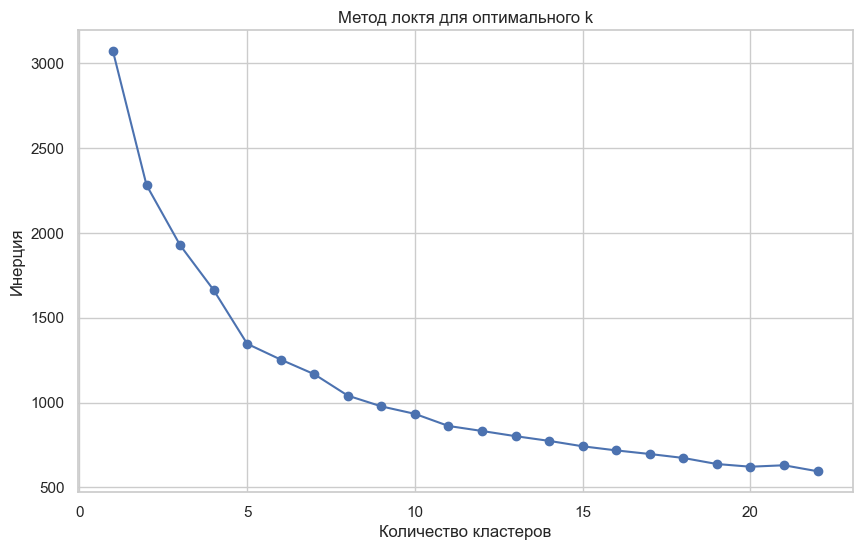

In [26]:
inertias = []
clusters_range = range(1, 23)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

+- после 18-го кластера функция принимает линейный вид, что говорит о следующем: создание более 18-го кластера - не самое оптимальное решение, дальнейшее разбиение данных становится избыточным.

Расчитаем коэффициенты силуэта

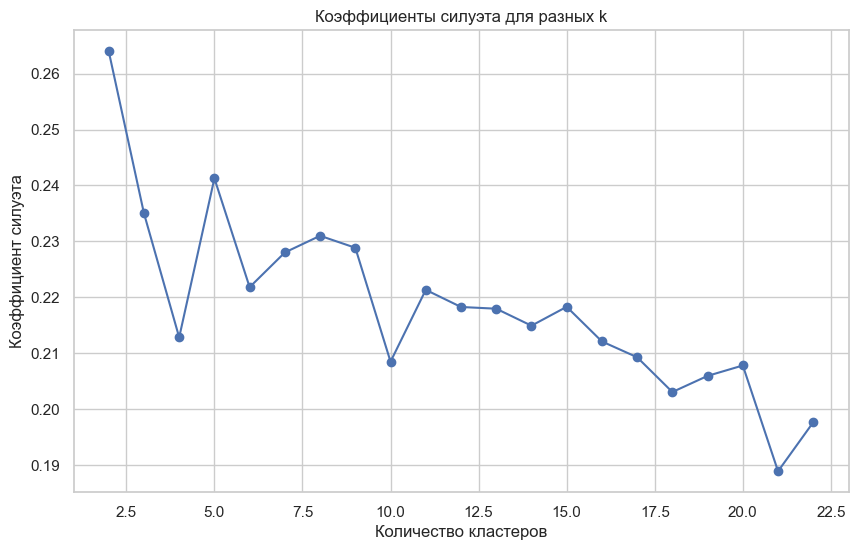

In [27]:
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта (silhouette score) используется для оценки качества кластеризации. Его значение лежит в диапазоне от -1 до 1. Что означают различные значения:

0.7–1.0 : Кластеры хорошо разделены и компактны. Это отличный результат кластеризации.
0.5-0.7 : Кластеры четко различимы, но есть некоторое пересечение между ними. Это хороший результат.
0.25-0.5 : Кластеры перекрываются, что указывает на менее четкую границу между группами. Качество кластеризации удовлетворительное, но может потребоваться уточнение числа кластеров или доработка данных.
Близко к 0.0: Кластеры сильно перекрываются или распределение данных не позволяет выделить четкие группы. В этом случае нужно пересмотреть выбор числа кластеров, алгоритм или исходные данные.
Меньше 0.0: Плохая кластеризация: точки ближе к центрам чужих кластеров, чем к своим. Это сигнал о том, что данные плохо структурированы для текущей кластеризации.

Средний коэффициент силуэта: 0.213


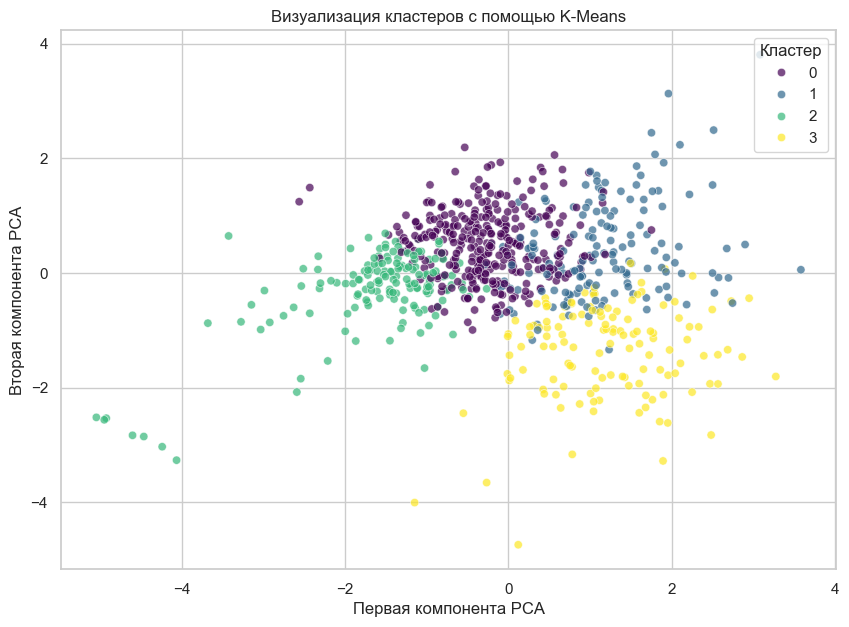

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned[['Glucose', 'BMI', 'BloodPressure', 'Age']])

# Применение K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  
df_clusters = kmeans.fit_predict(data_scaled)

# Оценка качества кластеризации
silhouette_avg = silhouette_score(data_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# Визуализация кластеров
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

В нашем случае, результат соответствует удовлетворительному состоянию. На графике видно, что кластеры имеют некоторую степень пересечения, что приемлемо. Это может указывать на сложность четкого разделения групп пациентов из-за схожести их характеристик (например, уровня глюкозы, индекса массы тела или давления).